In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 06.1 

The goal in this exercise it to calculate the internal energy, the specif heat, the suscetibility and the magnetization of a 1D Ising model with $50$ spin and $J=1$. Via Metropolis algorithm and Gibbs sampling it is possible to sample the Boltzmann's weitght $p(\{ s_i \}) = \exp(-\beta H)/Z$ by switching one spin of the system randomly chosen at a time and accepting the new configuration with Boltzmann's probability. The difference between the two algorithm is that the Gibbs sampling uses conditional probabilities. 

Thanks to the sampling it is possible to calculate the thermodynamic quantities in the following way: 
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

where the Hamiltonian is equal to 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

I computed this four propierties at $20$ different value of the temperature included in the intervall $[0.5,2]$. To equilibrate I watched after how many steps the state with the lowest temperature ($T=0.5$) reached equilibrium, e.g. after how much time all the spins were orientated in the same way. I saw that $10^4$ steps were enough to reach this goal. I used the same number of steps to equilibrate the states at the higher temperatures. After the equilibration, for each temperature I did a simulation in which the propiertes were averaged over $10^5$ steps for each of the $20$ blocks. The resulting uncertainties are very small. 

In the following plots we can see that the experimental points obtained with the two sampling are in very good agreement with the analytical curve.  

In [2]:
#parametri per curva analitica
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

h=0.02 
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

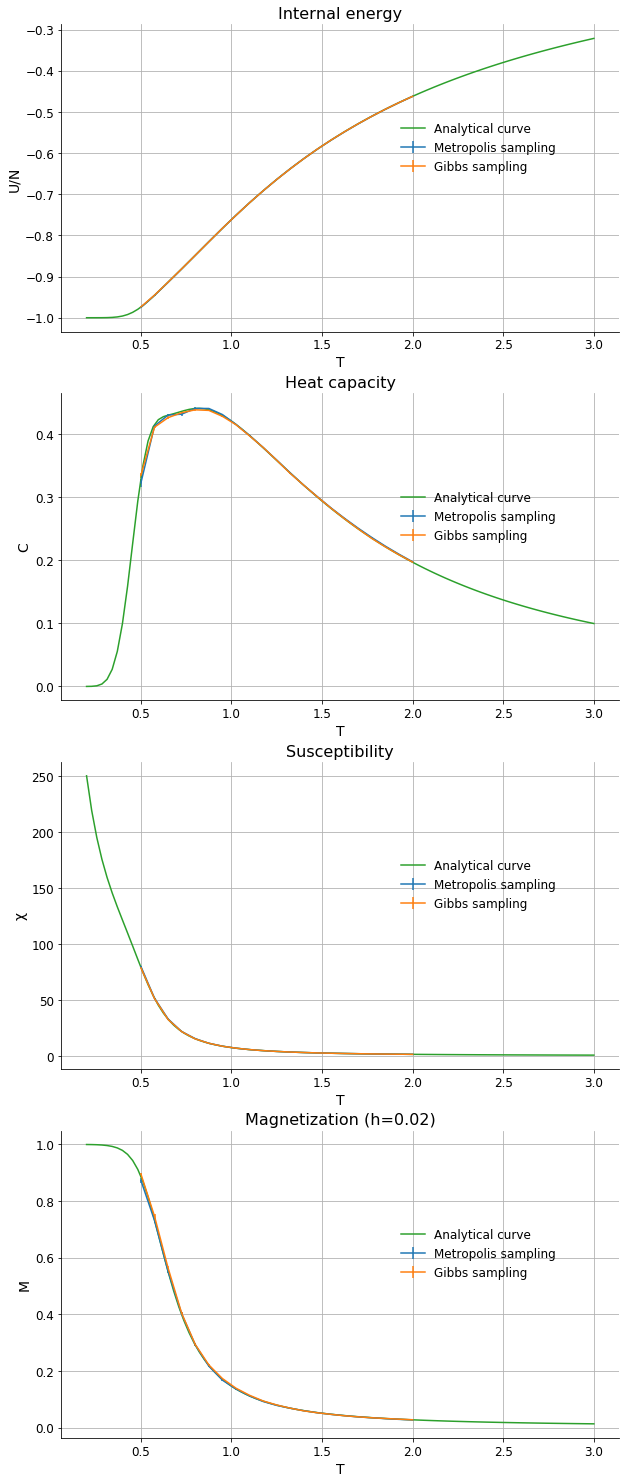

In [3]:
fig, ax = plt.subplots(4, 1, figsize=(10, 26))

x = np.zeros((4,43))
f = np.zeros((4,43))
error = np.zeros((4,43))
prop = ['ene','heat','chi','mag']
teo =[e,heat,X,M]
xlabel = ['U/N', 'C', '\u03C7','M']
title = ['Internal energy', 'Heat capacity', 'Susceptibility', 'Magnetization (h=0.02)']

for i in range(4):
    x[i,0:21], f[i,0:21], error[i,0:21] = np.loadtxt(f"{prop[i]}_temp_metrop.txt", usecols=(0,1,2), unpack='true')
    x[i,22:43], f[i,22:43], error[i,22:43] = np.loadtxt(f"{prop[i]}_temp_gibbs.txt", usecols=(0,1,2), unpack='true')

for i in range(4):
    axx = ax[i]
    axx.errorbar(x[i,0:21],f[i,0:21],yerr=error[i,0:21], label = "Metropolis sampling")
    axx.errorbar(x[i,22:43],f[i,22:43],yerr=error[i,22:43], label = "Gibbs sampling")
    axx.plot(T,teo[i], label = "Analytical curve")
    axx.set_title(title[i])
    axx.set_xlabel(r'T')
    axx.set_ylabel(xlabel[i])
    axx.legend(loc=(0.6, 0.5), frameon=False)
    axx.grid(True)